# Clasificador mediante Naive Bayes
## Autor: Ronie Martínez

#### Trabajo presentado como actividad propuesta para la asignatura "Aprendizaje Automático"

## Objetivo

Aplicar al conjunto de datos proporcionado el clasificador de Naive Bayes. Los datos se proporcionan en formato csv.

## Información sobre los datos
El enlace: https://archive.ics.uci.edu/ml/datasets/congressional+voting+records contiene la información necesaria sobre los datos, la variable respuesta es “Class name”.
Los datos tratan información relacionada con el voto en las elecciones americanas.

## Pasos a seguir (orientativo):

- Análisis descriptivo de los datos
- Determinar el conjunto de modelización y el de validación
- Tratamiento de missing
- Calcular las métricas de evaluación de ajuste adecuadas
- Comentar los resultados obtenidos
- Otros comentarios que parezcan adecuados

## Desarrollo:


### - Importamos el dataset y lo visualizamos

In [1]:
import numpy as np
import pandas as pd

nombre_csv = 'house-votes-84.data.csv'
column_names = ['class-name', 
                'handicapped-infants', 
                'water-project-cost-sharing', 
                'adoption-of-the-budget-resolution', 
                'physician-fee-freeze', 
                'el-salvador-aid', 
                'religious-groups-in-schools', 
                'anti-satellite-test-ban', 
                'aid-to-nicaraguan-contras', 
                'mx-missile', 
                'immigration', 
                'synfuels-corporation-cutback', 
                'education-spending', 
                'superfund-right-to-sue', 
                'crime', 
                'duty-free-exports', 
                'export-administration-act-south-africa']

# Creamos nuestro dataframe con la información proporcionada
raw_data = pd.read_csv(nombre_csv, names=column_names)#, na_values='?')
# na_values='?' para definir estos valores como NaN en caso de querer eliminarlos

# Función display solo funciona en jupyter notebook!
display(raw_data.head()) #435x17

,class-name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


### - Análisis descriptivo de los datos

El _dataset_ proporcionado incluye los votos (en el año 1984) de los 435 miembros de la Cámara de Representantes de Estados Unidos sobre los 16 planteamientos identificados por el CQA (_Congressional Quarterly Almanac_). 

El CQA define nueve diferentes tipos de votos, los cuales se clasifican de la siguiente manera:
- **'y/yea'**: voted for, paired for, and announced for
- **'n/nay'**:voted against, paired against, and announced against
- **'?'**: voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known

A continuación se presenta un breve resumen de los datos:

In [2]:
# Creamos una copia del dataset original, para trabajar
dataset = raw_data.copy()

# Usamos la función describe() para el resumen del dataframe
stats = dataset.describe()
stats = stats.transpose()
display(stats)

,count,unique,top,freq
class-name,435,2,democrat,267
handicapped-infants,435,3,n,236
water-project-cost-sharing,435,3,y,195
adoption-of-the-budget-resolution,435,3,y,253
physician-fee-freeze,435,3,n,247
el-salvador-aid,435,3,y,212
religious-groups-in-schools,435,3,y,272
anti-satellite-test-ban,435,3,y,239
aid-to-nicaraguan-contras,435,3,y,242
mx-missile,435,3,y,207


### - Tratamiento de missing

Muchas veces, la solución ante valores desconocidos, sería eliminarlos (usando la función dropna()) y proceder a realizar el procesamiento normalmente. Sin embargo, en este escenario, si decidimos realizar esta acción, estaríamos perdiendo más del 50% de los datos recolectados. Además, y gracias a la especificación incluida en el dataset, podemos asumir la siguiente postura:

"Es importante identificar que el valor '?' en el dataset **no** significa que el valor del atributo es desconocido, sino que no es un valor 'y/yea' ni 'n/nay'." Es decir, se puede tomar como un tercer valor para el análisis correspondiente.

Ahora, si bien se podrían utilizar términos estadísticos relativos a la tendencia (ej. media, moda) o incluso valores aleatorios, se decidió finalmente por definir los datos de la siguiente manera:

'n' = 0.0

'y' = 1.0

'?' = 0.5

Estas relaciones pueden ser permutadas indistintamente (ej. 'n'=0.5, 'y'=0.0, '?'=1.0).
Siendo estos valores equidistantes y normalizados, por lo que se espera que su definición sea óptima para la ejecución del clasificador Naive Bayes.

In [3]:
dataset[dataset=='n']=0.0
dataset[dataset=='y']=1.0
dataset[dataset=='?']=0.5
display(dataset.head())

,class-name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,0.5,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0.5
2,democrat,0.5,1,1,0.5,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0.5,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0.5,1,1,1,1


### - Determinar el conjunto de modelización y el de validación

Para realizar el proceso de _hold-out_ (división entre train set y test set), es recomendable realizarlo de manera aleatoria debido a que se desconoce la naturaleza de la obtención de los datos.

In [4]:
# Hold-out (train and test)
#from sklearn.model_selection import train_test_split
train_dataset = dataset.sample(frac=0.8, random_state=0) #aleatorio
test_dataset = dataset.drop(train_dataset.index)
print("Train dataset shape: ",train_dataset.shape)
print("Test dataset shape: ",test_dataset.shape)
# También se puede hacer uso de la función train_test_split()
# from sklearn.model_selection import train_test_split

# Separación de la columna "resultado"
train_labels = train_dataset.pop('class-name')
test_labels = test_dataset.pop('class-name')

Train dataset shape:  (348, 17)
Test dataset shape:  (87, 17)


La relación de división entre train y test es de 80% - 20%. Se realizó el procedimiento también con una relación de 70% - 30%, pero no hubo mayor diferencia (máximo 1% de diferencia en las métricas obtenidas a continuación).

### - Calcular las métricas de evaluación de ajuste adecuadas

Para esto, definimos qué modelo de Naive Bayes vamos a utilizar. Tenemos tres opciones.

In [5]:
# Importamos las librerías necesarias que contienen los modelos
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
# y las funciones para calcular las métricas
from sklearn import metrics

Se realiza el modelo con la función **fit()**, ingresando los datos y las etiquetas del training set.

Se evalúa el modelo con la función **predict()**, ingresando los datos y comparando las respuestas con las etiquetas del test set.

Para hallar la matriz de confusión se utiliza la función **confusion_matrix()**, ingresando las etiquetas del test set y las predichas.

Para hallar otras métricas de evaluación de desempeño (precision, recall, f1-score, etc) se utiliza la función **classification_report()**, ingresando las etiquetas del test set y las predichas.

**GaussianNB**

In [6]:
gnb = GaussianNB()
pred_labels_G = gnb.fit(train_dataset, train_labels).predict(test_dataset)
print("GaussianNB. Número de errores de un total de %d puntos : %d" 
      % (test_dataset.shape[0],(test_labels != pred_labels_G).sum()))
print("---Matriz de confusión---")
print(metrics.confusion_matrix(test_labels, pred_labels_G))
print("---Métricas---")
print(metrics.classification_report(test_labels, pred_labels_G))

GaussianNB. Número de errores de un total de 87 puntos : 4
---Matriz de confusión---
[[53  2]
 [ 2 30]]
---Métricas---
              precision    recall  f1-score   support

    democrat       0.96      0.96      0.96        55
  republican       0.94      0.94      0.94        32

   micro avg       0.95      0.95      0.95        87
   macro avg       0.95      0.95      0.95        87
weighted avg       0.95      0.95      0.95        87



Este modelo es utilizado cuando se tienen datos continuos. 

Podría ser notablemente útil si se define aleatoriamente los valores '?', como se explicó anteriormente.

Para graficar la ROC y obtener el AUC necesitamos hacer una breve manipulación de los datos para que estén presentados de manera binaria.

AUC:  0.686046511627907


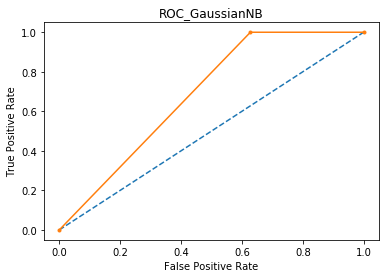

In [7]:
from matplotlib import pyplot
%matplotlib inline

test_l = np.zeros(len(test_labels))
pred_l_G = np.zeros(len(pred_labels_G))

for i in range (len(pred_labels_G)):
    if pred_labels_G[i] == 'democrat':
        pred_l_G[i] = 1.0
        
for j in test_labels.index:
    ind = 0
    if test_labels[j] == 'democrat':
        test_l[ind] = 1.0
    ind = ind+1
        
print("AUC: ", metrics.roc_auc_score(test_l, pred_l_G))
# ROC
fpr, tpr, thresholds = metrics.roc_curve(test_l, pred_l_G)

# Gráfica
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.title('ROC_GaussianNB')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

**BernoulliNB**

In [8]:
bnb = BernoulliNB()
pred_labels_B = bnb.fit(train_dataset, train_labels).predict(test_dataset)
print("BernoulliNB. Número de errores de un total de %d puntos : %d" 
      % (test_dataset.shape[0],(test_labels != pred_labels_B).sum()))
print("---Matriz de confusión---")
print(metrics.confusion_matrix(test_labels, pred_labels_B))
print("---Métricas---")
print(metrics.classification_report(test_labels, pred_labels_B))

BernoulliNB. Número de errores de un total de 87 puntos : 3
---Matriz de confusión---
[[53  2]
 [ 1 31]]
---Métricas---
              precision    recall  f1-score   support

    democrat       0.98      0.96      0.97        55
  republican       0.94      0.97      0.95        32

   micro avg       0.97      0.97      0.97        87
   macro avg       0.96      0.97      0.96        87
weighted avg       0.97      0.97      0.97        87



Este modelo es utilizado cuando se tienen datos discretos.

Este modelo discreto, generalmente se utiliza cuando los _features_ de entrada son booleanos independientes (variables binarias). Sería particularmente útil si se decide eliminar los valores '?' o si se los reemplaza con la moda, tal como se comentó anteriormente.

Para graficar la ROC y obtener el AUC necesitamos hacer una breve manipulación de los datos para que estén presentados de manera binaria.

AUC:  0.6918604651162791


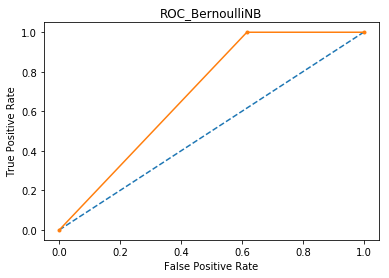

In [9]:
pred_l_B = np.zeros(len(pred_labels_B))

for i in range (len(pred_labels_B)):
    if pred_labels_B[i] == 'democrat':
        pred_l_B[i] = 1.0
        
print("AUC: ", metrics.roc_auc_score(test_l, pred_l_B))
# ROC
fpr, tpr, thresholds = metrics.roc_curve(test_l, pred_l_B)

# Gráfica
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.title('ROC_BernoulliNB')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

**MultinomialNB**

In [10]:
mnb = MultinomialNB()
pred_labels_M = mnb.fit(train_dataset, train_labels).predict(test_dataset)
print("MultinomialNB. Número de errores de un total de %d puntos : %d" 
      % (test_dataset.shape[0],(test_labels != pred_labels_M).sum()))
print("---Matriz de confusión---")
print(metrics.confusion_matrix(test_labels, pred_labels_M))
print("---Métricas---")
print(metrics.classification_report(test_labels, pred_labels_M))

MultinomialNB. Número de errores de un total de 87 puntos : 4
---Matriz de confusión---
[[52  3]
 [ 1 31]]
---Métricas---
              precision    recall  f1-score   support

    democrat       0.98      0.95      0.96        55
  republican       0.91      0.97      0.94        32

   micro avg       0.95      0.95      0.95        87
   macro avg       0.95      0.96      0.95        87
weighted avg       0.96      0.95      0.95        87



Este modelo es utilizado cuando se tienen datos discretos. 

Debido a que se trata de distribución multinomial (binomial), este modelo sería uno de los más recomendados a utilizar.

Para graficar la ROC y obtener el AUC necesitamos hacer una breve manipulación de los datos para que estén presentados de manera binaria.

AUC:  0.6976744186046512


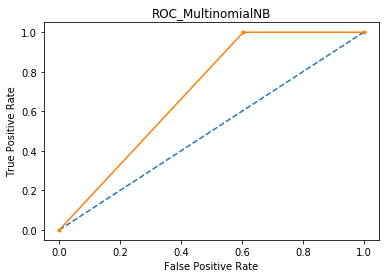

In [11]:
pred_l_M = np.zeros(len(pred_labels_M))

for i in range (len(pred_labels_M)):
    if pred_labels_M[i] == 'democrat':
        pred_l_M[i] = 1.0
        
print("AUC: ", metrics.roc_auc_score(test_l, pred_l_M))
# ROC
fpr, tpr, thresholds = metrics.roc_curve(test_l, pred_l_M)

# Gráfica
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.title('ROC_MultinomialNB')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()